# Datos del alumno

**Nombre**: Brianny


**Apellidos**:Hernandez Troncoso


**Grupo:** A1

# **Sprint 1**

## Estudio descriptivo de los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [2]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK' -O 'Rotacion_empleados.csv'

--2024-02-26 23:15:05--  https://drive.google.com/uc?export=download&id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:804::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK&export=download [following]
--2024-02-26 23:15:06--  https://drive.usercontent.google.com/download?id=1ZwgdmI525zInDh1SQVm7FZt8kWxfrvOK&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.0.65, 2607:f8b0:4025:810::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 551779 (539K) [application/octet-stream]
Saving to: ‘Rotacion_empleados.csv’

Rotacion_empleados. 100%[===================>] 538.85K  --.-KB/s    in 0

In [3]:
# Leemos el conjunto de datos
datos = pd.read_csv("Rotacion_empleados.csv")

In [4]:
# obtenemos las filas y columnas qu contiene
datos.shape

(14999, 10)

In [5]:
# Veamos los primeros datos
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
#obtenemos información sobre las variables que contiene este data set
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Significado y contenido de las variables.

* **satisfaction_level**: Es el nivel de satisfacción de los empleados, que va de 0-1.

* **last_evaluation**: Se evalúa el desempeño por parte del empleador, el cual también va de 0-1..

* **number_projects**: ¿Cual es el  número de proyectos asignados a un empleado?

* **average_monthly_hours**: ¿Cuántas horas promedio trabaja un empleado en un mes?

* **time_spent_company**: significa experiencia del empleado. Número de años de permanencia de un empleado en la empresa.

* **work_accident**: si un empleado ha tenido un accidente de trabajo o no.

* **promotion_last_5years**: si un empleado ha tenido una promoción en los últimos 5 años o no..

* **sales**: departamento/división a la que pertenece el empleado.

* **Salary**: Nivel salarial del empleado en los niveles:low, medium and high.

* **left**: Si el empleado ha dejado la empresa o no. (0: No, 1: Sí)

Observemos que la variable con denominación "sales" no expresa adecuadamente el contenido de la variable, quizá sea más procedente denominarla `department`, que es lo que hacemos a continuación.

In [4]:
datos.rename(columns={'sales': 'department'}, inplace=True)
datos.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Análisis descriptivo de los datos

In [8]:
datos.department.value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: department, dtype: float64

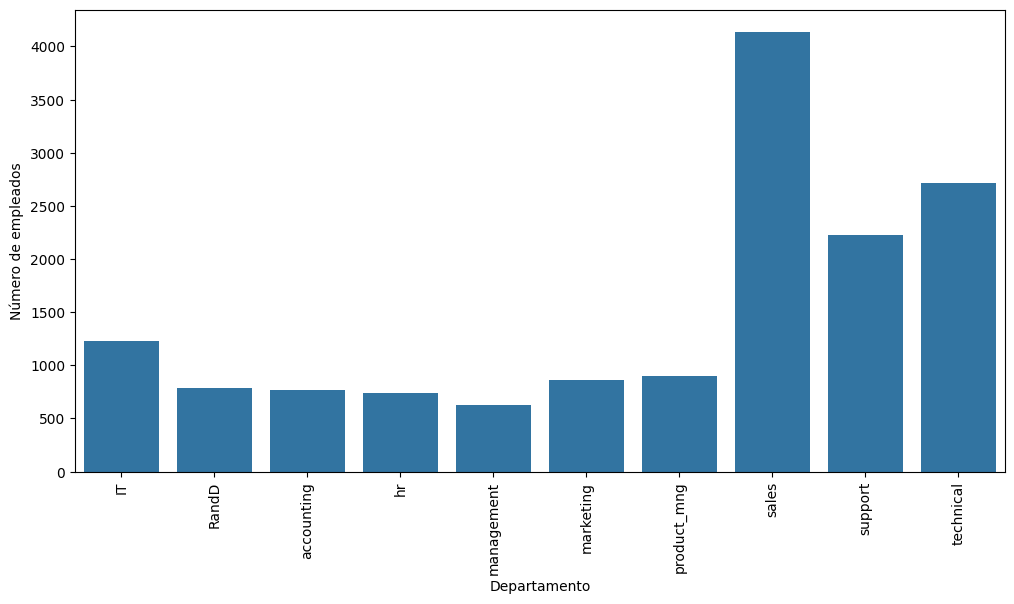

In [9]:
plt.figure(figsize=(12,6))
data_group = datos.groupby(by=['department'],as_index=False).count()
ax = sns.barplot(x="department", y="left", data=data_group)
ax.set(xlabel='Departamento', ylabel='Número de empleados')

plt.xticks(rotation = 90);

Podemos ver que casi un 30% de los empleados presentes en la muestra pertenecen al departamento de ventas.

1.   Si queremos predecir si un empleado abandona o no la empresa, ¿estamos ante un problema de clases balanceado o desbalanceado? Justifica tu respuesta incluyendo un gráfico que represente el número observaciones en cada una de las clases.

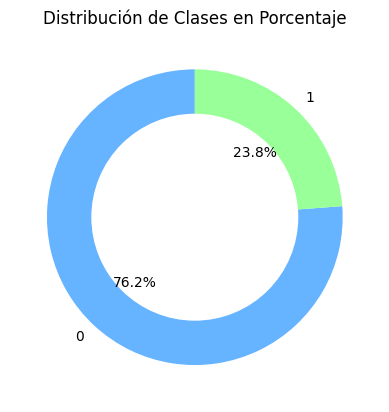

In [10]:
porcentajes = datos['left'].value_counts(normalize=True) * 100
plt.pie(porcentajes, labels=porcentajes.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])

centro_circulo = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)

plt.title('Distribución de Clases en Porcentaje')
plt.show()

Es un problema de clases desbalanceadas debido a que hay una gran diferencia en el número de observaciones entre las clases, por ejemplo, el 76.2% de las observaciones son de la clase "No" y el 23.8% son de la clase "Sí". Esto puede llevar a que el modelo tenga dificultades para predecir la clase minoritaria, ya que tiene menos ejemplos para aprender.

2.   Estudiar cómo se ditribuye la variable `left`en función de los siguientes atributos categóricos: `number_project`,`time_spend_company`,`Work_accident`,`department`, `promotion_last_5years`,`salary`.

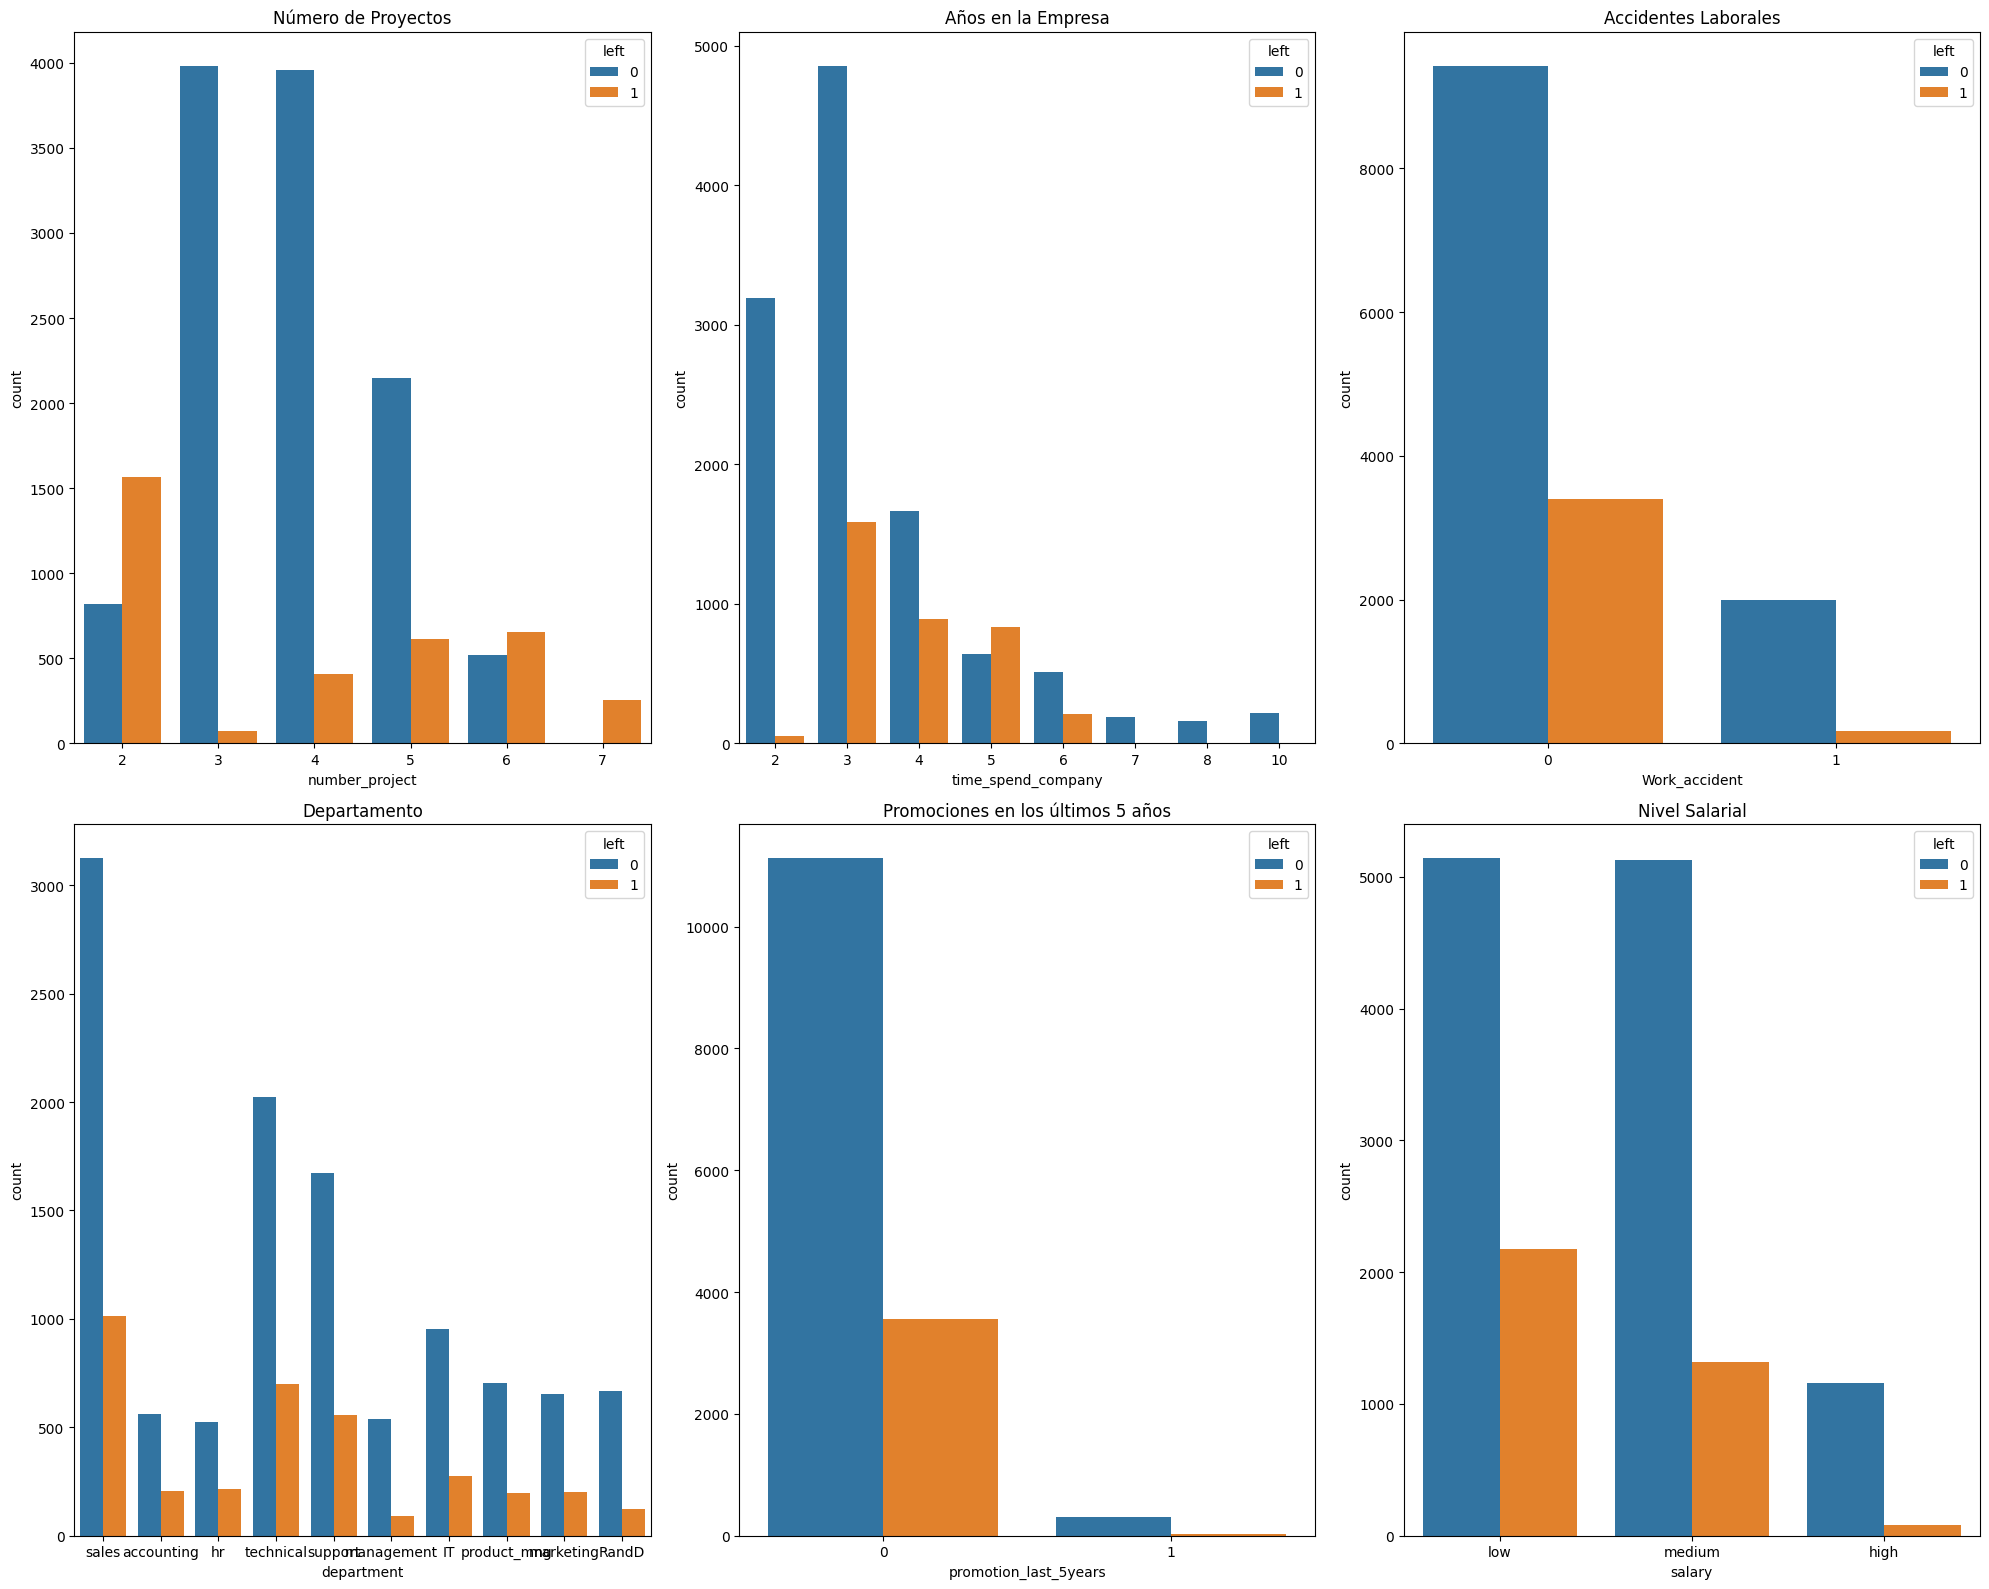

In [11]:
plt.figure(figsize=(20, 16))

# Subgráfico 1: number_project
plt.subplot(2, 3, 1)
sns.countplot(x='number_project', hue='left', data=datos)
plt.title('Número de Proyectos')

# Subgráfico 2: time_spend_company
plt.subplot(2, 3, 2)
sns.countplot(x='time_spend_company', hue='left', data=datos)
plt.title('Años en la Empresa')

# Subgráfico 3: Work_accident
plt.subplot(2, 3, 3)
sns.countplot(x='Work_accident', hue='left', data=datos)
plt.title('Accidentes Laborales')

# Subgráfico 4: department
plt.subplot(2, 3, 4)
sns.countplot(x='department', hue='left', data=datos)
plt.title('Departamento')

# Subgráfico 5: promotion_last_5years
plt.subplot(2, 3, 5)
sns.countplot(x='promotion_last_5years', hue='left', data=datos)
plt.title('Promociones en los últimos 5 años')

# Subgráfico 6: salary
plt.subplot(2, 3, 6)
sns.countplot(x='salary', hue='left', data=datos)
plt.title('Nivel Salarial')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar la figura
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


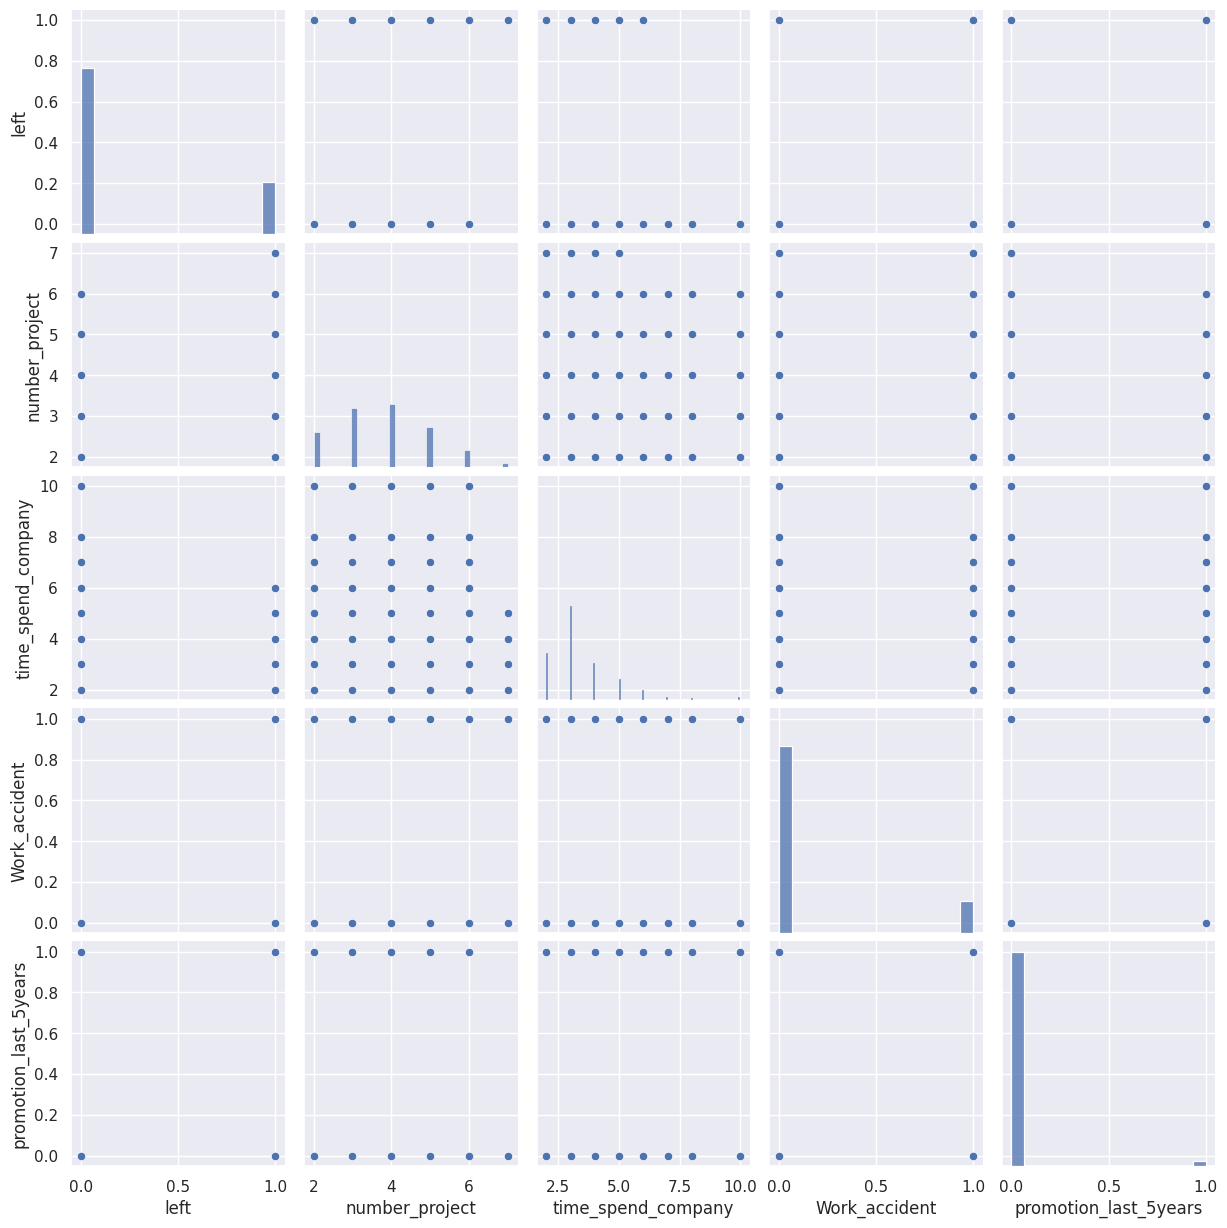

In [12]:
sns.set()
cols = ['left', 'number_project', 'time_spend_company', 'Work_accident', 'department', 'promotion_last_5years', 'salary']
sns.pairplot(datos[cols], size = 2.5)
plt.show();

En cuanto a la distribución de la variable ‘left’ con las variables categóricas, se pudo observar lo siguiente:

*  Número de proyectos: mientras menos proyectos tenga asignado es más probable que el empleado se vaya, pero si está del otro lado del extremo también se irán, existe una tendencia que cuando llegan a 7 proyectos es seguro que abandonen la empresa.
* Años en la empresa: La mayor parte de empleados que abandonan la empresa se
encuentra en los 3-6 años.
*Accidente laboral: entiendo que esta variable no guarda mucha relación con si abandona o no la empresa debido a que es la misma proporción de si tienen un accidente como si no lo tienen.
*Departamentos: De igual manera para los departamentos tienen un abandono relativo a la cantidad de personas que no se han ido, los casos donde existe mas abandono son Sales, accounting, hr y technical
*Promociones: Las promociones tienen un impacto positivo en determinar si se quedara o no, debido a que gran parte de los que no han recibido promociones son los que se han ido.
*Salario: en esta variable si se nota la brecha entre las personas que ganan menos ya que son las que tienden a abandonar la empresa.

<ipython-input-13-17d72984b22f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = datos.corr()


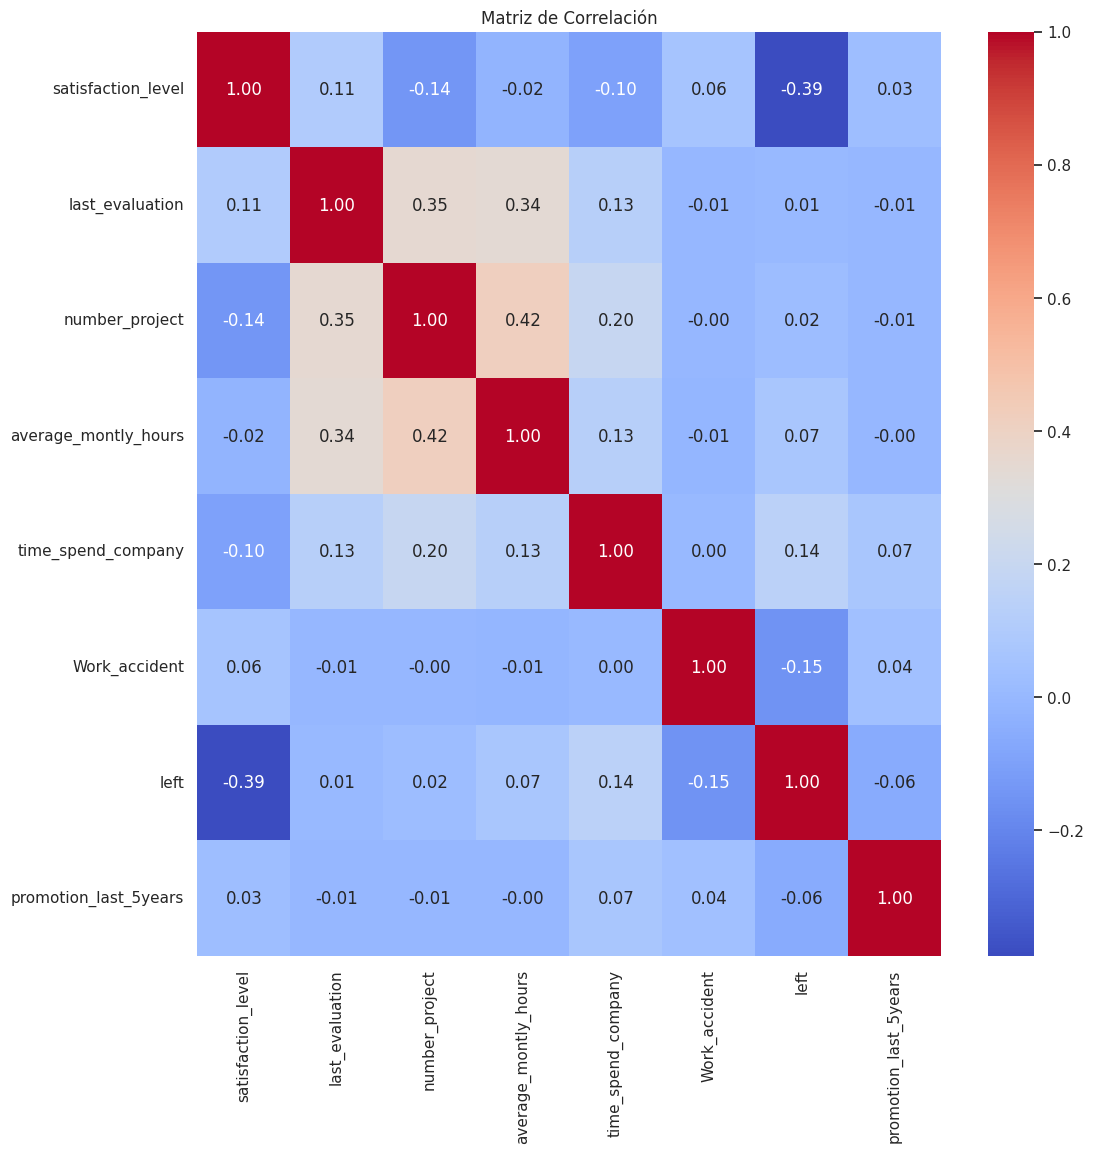

In [13]:
# Calcular la matriz de correlación
correlation_matrix = datos.corr()

# Obtener las correlaciones absolutas con la variable "target"
correlations_with_target = correlation_matrix['left'].abs().sort_values(ascending=False)

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


La variable que presenta una correlación más o menos significativa con ‘left’ es el nivel de satisfacción. Por otro lado se visualiza la relación que tienen entre si las variables last_evaluation, number_project y average_monthly_hours.

## Análisis predictivo

## Preparación de los datos

In [14]:
datos.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

Podemos observar que hay algunas variables que son de tipo categórico con categorías en formato literal (`object`). Como hemos visto en la teoría, hay algunos modelos que no admiten esta codificación de las categorías, por lo que las transformamos a formato numérico.

La variable `salary`(salario) sí que podemos considerarla como de tipo ordinal. Sin embargo, esto no aplica a la variable `department`. A esta variable habrá que transformarla en variables de tipo dummy.

In [5]:
#Transformacion de la variable salary
from sklearn.preprocessing import OrdinalEncoder
salary_column = datos[['salary']]
encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
datos['salary_encoded'] = encoder.fit_transform(salary_column)
print(datos[['salary', 'salary_encoded']])

       salary  salary_encoded
0         low             0.0
1      medium             1.0
2      medium             1.0
3         low             0.0
4         low             0.0
...       ...             ...
14994     low             0.0
14995     low             0.0
14996     low             0.0
14997     low             0.0
14998     low             0.0

[14999 rows x 2 columns]


In [6]:
datos['salary_encoded'].dtype

dtype('float64')

In [7]:
datos['salary_encoded'] = datos['salary_encoded'].astype('int64')

In [8]:
datos.drop('salary', axis=1, inplace=True)

In [9]:
#Transformar variable department en dummy
departamento_dummies = pd.get_dummies(datos['department'], prefix='department')

# Concatenar las variables dummies al DataFrame original
datos = pd.concat([datos, departamento_dummies], axis=1)

# Eliminar la columna original 'department'
datos.drop('department', axis=1, inplace=True)

In [20]:
valores_faltantes = (datos.isnull().sum())
valores_faltantes

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
salary_encoded            0
department_IT             0
department_RandD          0
department_accounting     0
department_hr             0
department_management     0
department_marketing      0
department_product_mng    0
department_sales          0
department_support        0
department_technical      0
dtype: int64

## Implementación de los modelos

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = datos.drop('left', axis=1)
y = datos['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

#### Modelo 1: KNN

In [23]:
from sklearn.preprocessing import Normalizer
scaler= Normalizer().fit(X_train)
normalized_X_train= scaler.transform(X_train) # Aplicamos el escalado a datos de entrenamiento
normalized_X_test= scaler.transform(X_test) # Aplicamos el escalado a datos de test

In [24]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
knn=KNeighborsClassifier(n_neighbors= K)
knn.fit(normalized_X_train, y_train)
y_pred= knn.predict(normalized_X_test)
y_pred_train = knn.predict(normalized_X_train)

#### Modelo 2: Logistic Regression

In [26]:
X_train_lg, X_test_lg,y_train_lg,y_test_lg = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_lg = sc.fit_transform(X_train_lg)
X_test_lg = sc.transform(X_test_lg)

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train_lg, y_train_lg)

LogisticRegression(random_state=0)

In [29]:
# Predicción de los datos test
y_pred_lg = classifier.predict(X_test_lg)
# Predicción de las probabiliades
probs_y_lg=classifier.predict_proba(X_test_lg)

# Predicción de los datos train
y_pred_train_lg = classifier.predict(X_train_lg)
# Predicción de las probabiliades
probs_y_train_lg=classifier.predict_proba(X_train_lg)


**KNN**

In [30]:
#ACCURACY
from sklearn.metrics import accuracy_score
print(f'El accuracy obtenido Test es de {accuracy_score(y_test, y_pred)}')
print(f'El accuracy obtenido de Train es de {accuracy_score(y_train, y_pred_train)}')

El accuracy obtenido Test es de 0.932
El accuracy obtenido de Train es de 0.9702475206267189


Tener un accuracy más alto en el conjunto de entrenamiento en comparación con el conjunto de prueba puede indicar un posible sobreajuste (overfitting). El sobreajuste ocurre cuando el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien a nuevos datos.

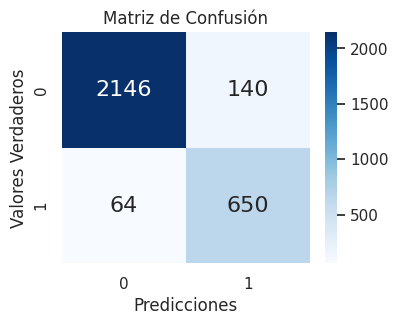

In [33]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

*   Verdaderos Positivos (VP): Hay 2146 verdaderos positivos, lo que significa que
el modelo predijo correctamente la clase 0 para esos casos.

*   Falsos Positivos (FP): Existen 140 falsos positivos, donde el modelo predijo incorrectamente la clase 1 cuando en realidad era la clase 0.
*   Falsos Negativos (FN): En la esquina inferior izquierda, hay 64 falsos negativos, donde el modelo predijo incorrectamente la clase 0 cuando era la clase 1.
*   Verdaderos Negativos (VN): Finalmente, hay 650 verdaderos negativos, donde el modelo acertó al predecir la clase 1.

In [34]:
#REPORTE DE CLASIFICACION
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2286
           1       0.82      0.91      0.86       714

    accuracy                           0.93      3000
   macro avg       0.90      0.92      0.91      3000
weighted avg       0.94      0.93      0.93      3000



* Precisión: el 97% de las instancias clasificadas como "No abandona" por el modelo realmente pertenecen a esa clase y el 82% de las instancias clasificadas como "Sí abandona" por el modelo realmente pertenecen a esa clase.
* Recall: 94%, lo que sugiere que el modelo identifica correctamente el 94% de las instancias que realmente pertenecen a la clase "No abandona" y el 91% a “si abandona”


En este caso, la media macro y la media ponderada de precision, recall y F1-score son alrededor del 90-94%, lo que sugiere un buen rendimiento general.

In [35]:
#Curva ROC y AUC
from sklearn.metrics import roc_curve, auc

#Training
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

#Test
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr_test, tpr_test)

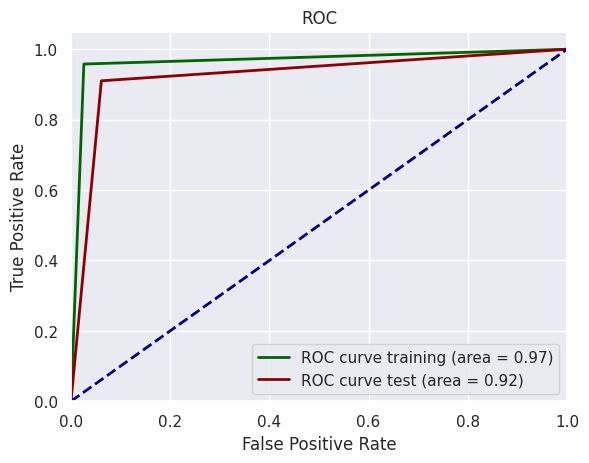

In [36]:
#Grafica
plt.figure()
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve training (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve test (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

**Logistic Regression**

In [37]:
#ACCURACY
accuracy_test = accuracy_score(y_test_lg, y_pred_lg)
print("Accuracy en Test:", accuracy_test)

accuracy_train = accuracy_score(y_train_lg, y_pred_train_lg)
print("Accuracy en Train:", accuracy_train)

Accuracy en Test: 0.793
Accuracy en Train: 0.7973997833152763


Al comparar el accuracy en el conjunto de prueba con el del conjunto de entrenamiento, observamos que no hay una gran diferencia entre ambos. Esto sugiere que el modelo no está sobreajustando significativamente los datos de entrenamiento.

La pequeña diferencia entre el accuracy en el conjunto de entrenamiento y el conjunto de prueba sugiere que el modelo generaliza de manera razonable a nuevos datos.

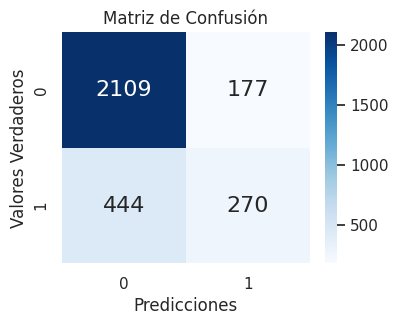

In [39]:
#MATRIZ DE CONFUSION
cm_lg = confusion_matrix(y_test_lg, y_pred_lg)


plt.figure(figsize=(4, 3))
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

In [40]:
#REPORTE DE CLASIFICACION
print(classification_report(y_test_lg, y_pred_lg))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2286
           1       0.60      0.38      0.47       714

    accuracy                           0.79      3000
   macro avg       0.72      0.65      0.67      3000
weighted avg       0.77      0.79      0.77      3000



* Precisión: significa que el 83% de las instancias clasificadas como "No abandona" por el modelo realmente pertenecen a esa clase y solo un 60% pertenece a “Si abandona”
* El recall identifica correctamente el 92% de las instancias que realmente pertenecen a la clase "No abandona" y un 38% a la otra clase. La baja recall en la clase "Sí abandona" indica que el modelo tiene dificultades para identificar correctamente las instancias de esa clase.
* El accuracy general del modelo en el conjunto de prueba es del 79%, que es la proporción de predicciones correctas en general.
* La media macro y la media ponderada de las métricas indican el rendimiento promedio del modelo en todas las clases. En este caso, la media macro y la media ponderada de precision, recall y F1-score son alrededor del 72-77%, lo que sugiere un rendimiento moderado.

In [41]:
#Curva ROC y AUC

#Training
fpr_train_lg, tpr_train_lg, _ = roc_curve(y_train_lg, y_pred_train_lg)
roc_auc_train_lg = auc(fpr_train_lg, tpr_train_lg)

#Test
fpr_test_lg, tpr_test_lg, _ = roc_curve(y_test_lg, y_pred_lg)
roc_auc_test_lg = auc(fpr_test_lg, tpr_test_lg)

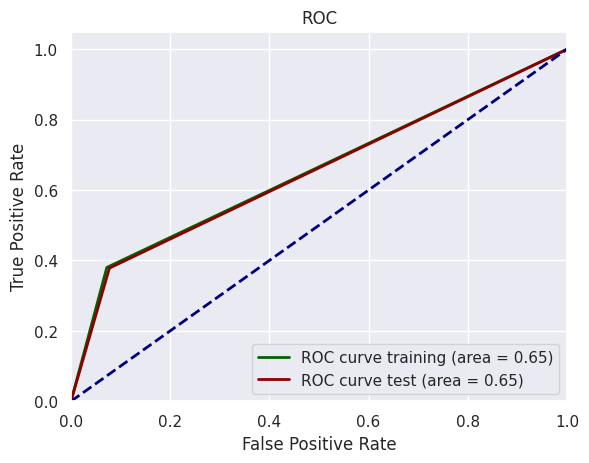

In [42]:
#Grafica
plt.figure()
lw = 2

plt.plot(fpr_train_lg,tpr_train_lg,color="darkgreen",lw=lw,label="ROC curve training (area = %0.2f)" % roc_auc_train_lg,)
plt.plot(fpr_test_lg,tpr_test_lg,color="darkred",lw=lw,label="ROC curve test (area = %0.2f)" % roc_auc_test_lg,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

**En resumen**

En general, una curva ROC con un área bajo la curva (AUC) más cercano a 1 indica un mejor rendimiento del modelo en la clasificación binaria. En este sentido, el KNN tiene un rendimiento superior en términos de AUC para ambas curvas (entrenamiento y prueba) en comparación con Logistic Regression.Aunque el KNN tiene un AUC ligeramente inferior en el conjunto de prueba en comparación con el conjunto de entrenamiento, aún puede ser preferible si ofrece un buen equilibrio entre precision y recall en el conjunto de prueba

##**Punto de mejora Sprint 1**

En este caso que queremos reducir el número de empleados que abandonan la empresa, ¿en qué métricas nos tendríamos que fijar para elegir un modelo sobre otro?

En la curva ROC y AUC de los conjuntos de entrenamiento y test, los valores falsos positvos y falsos negativos al predecir los resultados y el F1 Score ya que combina precision y recall en un solo número.

# **Sprint 2**

In [43]:
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             confusion_matrix,
                             classification_report)
from sklearn.model_selection import (cross_val_score,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     learning_curve,
                                     validation_curve,
                                     train_test_split)
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

%matplotlib inline

In [44]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.9 MB/s eta 0:00:00


In [45]:
from sklearn import tree
import dtreeviz
from sklearn.tree import export_text

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

## CUESTION 1 - Árbol con hiperparámetros por defecto

In [47]:
# Generamos un árbol de decisión para clasificación
clf_tree = tree.DecisionTreeClassifier(class_weight="balanced")

# El parámetro class_weight='balanced' emplea los valores de y para ajustar automáticamente los pesos de forma inversamente proporcional a la frecuencia de cada clase en el input

In [48]:
# Entrenamos el modelo con los datos de entrenamiento
clf = clf_tree.fit(X_train,y_train)

In [49]:
# Obtenemos las predicciones para el conjunto de test
y_pred = clf_tree.predict(X_test)

In [50]:
# ¿Cual es la profundidad del árbol entrenado?
profundidad_arbol = clf_tree.tree_.max_depth
print(f'La profundidad del árbol entrenado es: {profundidad_arbol}')

La profundidad del árbol entrenado es: 21


In [51]:
# Evaluar la capacidad predictiva del modelo
# Accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.984


In [52]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[2251,   35],
       [  13,  701]])

In [53]:
# Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2286
           1       0.95      0.98      0.97       714

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



**Resumen de resultados**

Una profundidad más grande indica un árbol más complejo y profundo. En este caso, el modelo clasifica correctamente el 98.57% de las instancias. El reporte de clasificación proporciona medidas detalladas que son especialmente útiles en problemas de clasificación desbalanceada.

* Recall: Proporción de instancias positivas correctamente clasificadas respecto al total de instancias que realmente son positivas. Para la clase 0, es del 99%, y para la clase 1, es del 98%.
* F1-score: Ofrece un equilibrio entre precisión y recall.

El modelo parece tener un rendimiento bastante bueno con una alta precisión y recall para ambas clases, pero el resultado de estos puede sugerir un sobreajuste y memorización de los datos.


## CUESTION 2 - Árbol modificando algún hiperparámetro

In [54]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [55]:
from sklearn.tree import DecisionTreeClassifier
clf_tree_2 = DecisionTreeClassifier(max_depth=5)

In [56]:
# Entrenamos el modelo con los datos de entrenamiento
clf_2 = clf_tree_2.fit(X_train_2,y_train_2)

In [57]:
# Obtenemos las predicciones para el conjunto de test
y_pred_2 = clf_tree_2.predict(X_test_2)

In [58]:
# Evaluar la capacidad predictiva del modelo
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_2))

Accuracy: 0.971


In [59]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_true=y_test_2, y_pred=y_pred_2)
conf_matrix

array([[2256,   30],
       [  57,  657]])

In [60]:
# Report
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.96      0.92      0.94       714

    accuracy                           0.97      3000
   macro avg       0.97      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



En resumen, el modelo con una profundidad máxima de 5 parece tener un buen rendimiento, ofreciendo un equilibrio entre sesgo y varianza. La precisión, recall y f1-score son altos para ambas clases, indicando una clasificación efectiva. La matriz de confusión proporciona información adicional sobre los tipos de errores que el modelo está cometiendo. Ajustar la profundidad máxima del árbol puede ser una estrategia útil para controlar la complejidad del modelo y evitar sobreajuste.

## CUESTION 3 - Árbol modificando algún hiperparámetro

In [61]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [62]:
#Impurezas de particiones
clf_tree_3 = DecisionTreeClassifier(criterion='gini', max_depth=7)

In [63]:
# Entrenamos el modelo con los datos de entrenamiento
clf_3 = clf_tree_3.fit(X_train_3,y_train_3)

In [64]:
# Obtenemos las predicciones para el conjunto de test
y_pred_3 = clf_tree_3.predict(X_test_3)

In [65]:
# Evaluar la capacidad predictiva del modelo
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_3, y_pred_3))

Accuracy: 0.978


In [66]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_true=y_test_3, y_pred=y_pred_3)
conf_matrix

array([[2273,   13],
       [  53,  661]])

In [67]:
# Report
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2286
           1       0.98      0.93      0.95       714

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



El reporte de clasificación proporciona métricas detalladas para cada clase, incluyendo precision, recall y f1-score.

En comparación con los modelos anteriores, este modelo parece ofrecer un buen equilibrio entre precisión y recall para ambas clases. La precisión global del 97.7% es bastante alta. La matriz de confusión y el reporte de clasificación proporcionan información adicional sobre la calidad de las predicciones y los tipos de errores que el modelo está cometiendo. En resumen, este árbol con criterion='gini' parece ser un buen modelo con un alto rendimiento en la clasificación, por estas razones en comparacion con los demas modelos propuestos este tiene mayor poder predictivo.

## CUESTION 4 - ¿Qué modelo tiene mayor poder predictivo?

El mejor modelo predictivo es el arbol #3, modificando el hiperparametro criterion='gini'.

Puesto que ya he utilizado las metricas adecuadas anteriormente para evaluar a los 3, debajo estara la representacion grafica de la matriz de confusion y la curva ROC/AUC del mejor modelo.

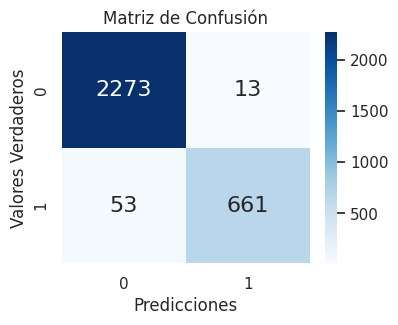

In [68]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_3, y_pred_3)


plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

In [69]:
# Obtenemos las predicciones para el conjunto de train
y_pred_train_3 = clf_tree_3.predict(X_train_3)

In [70]:
#Curva ROC y AUC
from sklearn.metrics import roc_curve, auc

#Training
fpr_train, tpr_train, _ = roc_curve(y_train_3, y_pred_train_3)
roc_auc_train = auc(fpr_train, tpr_train)

#Test
fpr_test, tpr_test, _ = roc_curve(y_test_3, y_pred_3)
roc_auc_test = auc(fpr_test, tpr_test)

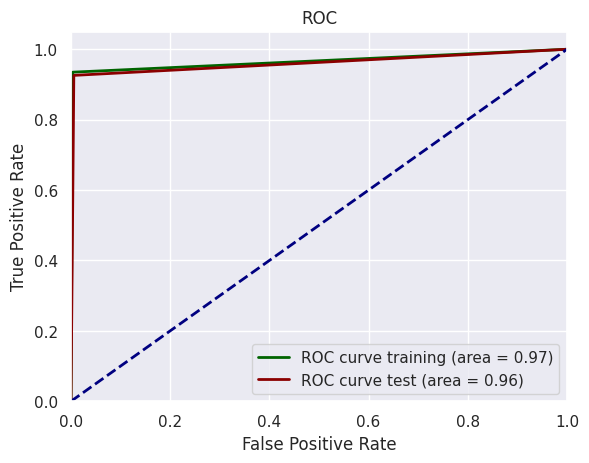

In [71]:
#Grafica
plt.figure()
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve training (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve test (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Los resultados sugieren que el modelo está haciendo un excelente trabajo tanto en el conjunto de entrenamiento como en el conjunto de prueba. Sin embargo, siempre es importante tener en cuenta la posibilidad de sobreajuste, especialmente si hay una brecha significativa entre el rendimiento en entrenamiento y prueba.

## CUESTION 5 - Representación del árbol

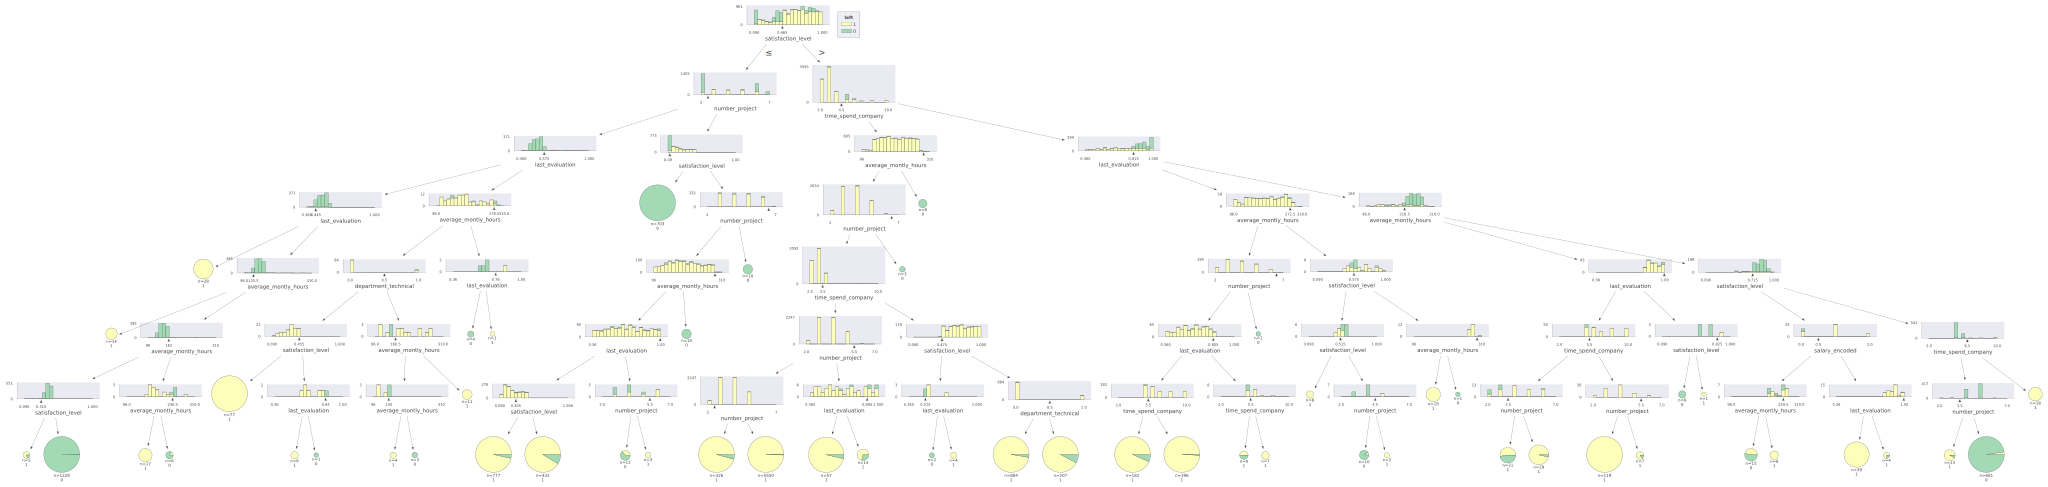

In [72]:
#Configuramos el adaptador
viz = dtreeviz.model(clf_tree_3,
X_train_3.values,
y_train_3.values,
target_name='left',
feature_names=X_train.columns,
class_names=["1","0"] # necesario class_names para el clasificador
)

#Llamamos al método para la visualización
viz.view(fontname='sans-serif',scale=2)

In [76]:
feature_names=X_train.columns

In [79]:
from sklearn.tree import export_text
feature_names_list = feature_names.tolist()
r = export_text(clf_tree_3, feature_names=feature_names_list)
print(r)

|--- satisfaction_level <= 0.47
|   |--- number_project <= 2.50
|   |   |--- last_evaluation <= 0.57
|   |   |   |--- last_evaluation <= 0.44
|   |   |   |   |--- class: 0
|   |   |   |--- last_evaluation >  0.44
|   |   |   |   |--- average_montly_hours <= 125.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- average_montly_hours >  125.50
|   |   |   |   |   |--- average_montly_hours <= 162.00
|   |   |   |   |   |   |--- satisfaction_level <= 0.31
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- satisfaction_level >  0.31
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- average_montly_hours >  162.00
|   |   |   |   |   |   |--- average_montly_hours <= 240.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- average_montly_hours >  240.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |--- last_evaluation >  0.57
|   |   |   |--- average_montly_hours <= 278.50
|   |   |   |   |--- department_technical <= 0.50
| 

**Explicacion del arbol**

El árbol comienza con una división basada en la variable satisfaction_level, donde los registros se dividen en dos ramas: aquellos con un nivel de satisfacción menor o igual a 0.47 y aquellos con un nivel de satisfacción mayor a 0.47.

* Primera Rama (Satisfacción <= 0.47):
En esta rama, se realizan más divisiones basadas en las variables number_project, last_evaluation, y average_montly_hours. Las hojas (nodos terminales) de esta rama contienen la clase a la que se asigna cada instancia, ya sea 0 o 1.
* Segunda Rama (Satisfacción > 0.47):
Esta rama se divide en subramas adicionales basadas en las variables time_spend_company, average_montly_hours, number_project, last_evaluation, y salary_encoded. Al igual que en la rama anterior, las hojas contienen las clases asignadas.

* Interpretación General:
El árbol se ramifica y toma decisiones basadas en diferentes variables para clasificar las instancias en clases 0 o 1. Las condiciones en cada nodo indican los límites y criterios para las divisiones. Las hojas representan las clases asignadas después de todas las divisiones.

Si satisfaction_level es menor o igual a 0.47, number_project es menor o igual a 2.5, y last_evaluation es menor o igual a 0.44, entonces la instancia se clasifica como clase 0.

##**Punto de mejora Sprint 2**

 ¿Qué tarea crees que es más importante en este caso, predecir lo mejor posible left=0 o left=1? ¿En qué métricas te apoyarías para evaluarlo?

 Clase Minoritaria (left=1): La predicción precisa de esta clase suele ser más crítica, ya que prever correctamente cuándo un empleado está por abandonar la empresa puede permitir a la organización tomar medidas preventivas para retener a los empleados clave y evitar pérdidas.

 Metricas:

* Precision: La precisión mide la proporción de instancias positivas predichas correctamente entre todas las instancias que el modelo predijo como positivas. En este caso, se refiere a la precisión de prever los casos en los que left=1.

* Recall (Sensibilidad o True Positive Rate): El recall mide la proporción de instancias positivas predichas correctamente entre todas las instancias positivas reales.

* F1-score: El F1-score es la media armónica de precision y recall. Es útil para obtener un equilibrio entre ambas métricas.

* Curva ROC y AUC: La curva ROC y el área bajo la curva (AUC) son útiles para evaluar el rendimiento del modelo a diferentes umbrales de clasificación. Un buen rendimiento en la clase minoritaria se reflejará en la parte superior izquierda de la curva ROC y un AUC significativo.


# **Sprint 3**

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from warnings import filterwarnings

%matplotlib inline

In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [82]:
X = datos.drop('left', axis=1)
y = datos['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

## CUESTION 1 - Modelo de tipo Bagging

### Combinación de hiperparámetros 1

Número de Árboles = 100

In [83]:
# Instanciamos el modelo con los hiperparámetros más adecuados
from sklearn.ensemble import RandomForestClassifier
#creamos el bosque aleatorio
clf=RandomForestClassifier(n_estimators=100, random_state=42)

In [84]:
# Entrenamos el modelo con los datos de entrenamiento
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [85]:
# Obtenemos las predicciones para el conjunto de test
y_pred=clf.predict(X_test)

In [86]:
# Evaluar la capacidad predictiva del modelo
#Importamos la clase metrics
from sklearn import metrics

# Obtenemos la acuracidad
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9936666666666667


In [87]:
#Predecir train
y_pred_train = clf.predict(X_train)

### Combinación de hiperparámetros 2

Control del tamaño de los subconjuntos del atributo

In [88]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [89]:
# Instanciamos el modelo con los hiperparámetros más adecuados
#creamos el bosque aleatorio
clf_2=RandomForestClassifier(max_features='sqrt', random_state=42)

In [90]:
# Entrenamos el modelo con los datos de entrenamiento
clf_2.fit(X_train_2,y_train_2)

RandomForestClassifier(random_state=42)

In [91]:
# Obtenemos las predicciones para el conjunto de test
y_pred_2=clf_2.predict(X_test_2)

In [92]:
# Evaluar la capacidad predictiva del modelo
# Obtenemos la acuracidad
print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_2))

Accuracy: 0.9936666666666667


In [93]:
#Predecir train
y_pred_train_2 = clf_2.predict(X_train_2)

## CUESTION 2 - Modelo de tipo Boosting

### Combinación de hiperparámetros 1

Tasa de aprendizaje y profundidad máxima del árbol.

In [94]:
X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [95]:
# Instanciamos el modelo con los hiperparámetros más adecuados
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc=HistGradientBoostingClassifier(learning_rate=0.05, max_depth=5, random_state=100)

In [96]:
# Entrenamos el modelo con los datos de entrenamiento
hgbc.fit(X_train_boost,y_train_boost)

HistGradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                               random_state=100)

In [97]:
# Obtenemos las predicciones para el conjunto de test
y_pred_boost=hgbc.predict(X_test_boost)

In [98]:
# Evaluar la capacidad predictiva del modelo
# Accuracy del modelo
print("HGBC accuracy es %2.2f" % accuracy_score(
     y_test_boost, hgbc.predict(X_test_boost)))

HGBC accuracy es 0.98


In [99]:
#Predecir train
y_pred_train_boost = hgbc.predict(X_train_boost)

### Combinación de hiperparámetros 2

Número máximo de iteraciones o estimadores en el conjunto

In [100]:
X_train_boost2, X_test_boost2, y_train_boost2, y_test_boost2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [101]:
# Instanciamos el modelo con los hiperparámetros más adecuados
hgbc_2 =HistGradientBoostingClassifier(max_iter=400, random_state=100)

In [102]:
# Entrenamos el modelo con los datos de entrenamiento
hgbc_2.fit(X_train_boost2, y_train_boost2)

HistGradientBoostingClassifier(max_iter=400, random_state=100)

In [103]:
# Obtenemos las predicciones para el conjunto de test
y_pred_boost2=hgbc_2.predict(X_test_boost2)

In [104]:
# Evaluar la capacidad predictiva del modelo
print("HGBC accuracy es %2.2f" % accuracy_score(
     y_test_boost2, hgbc_2.predict(X_test_boost2)))

HGBC accuracy es 0.99


In [105]:
#Predecir train
y_pred_train_boost2 = hgbc_2.predict(X_train_boost2)

## CUESTION 3 - ¿Qué modelo tiene mayor poder predictivo?

Comparar los diferentes árboles entrenados empleando las métricas más adecuadas para un problema desblanaceado como el nuestro.

**Modelo de tipo Bagging - Hiperparametro 1**

In [106]:
# Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2286
           1       0.99      0.98      0.99       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



La precisión para la clase 0 es del 99%, lo que significa que el 99% de las instancias clasificadas como clase 0 son realmente de clase 0. Para la clase 1, la precisión es del 99%, indicando que el 99% de las instancias clasificadas como clase 1 son realmente de clase 1. El recall para la clase 0 es del 100%, lo que significa que el modelo identifica correctamente todas las instancias de la clase 0. Para la clase 1, el recall es del 98%, lo que indica que el modelo identifica el 98% de las instancias de la clase 1. El F1-score es una métrica que combina precision y recall en un solo número. La puntuación F1 para la clase 0 es del 100%, y para la clase 1 es del 99%.  La precisión general del modelo indica que el 99% de las instancias se clasificaron correctamente

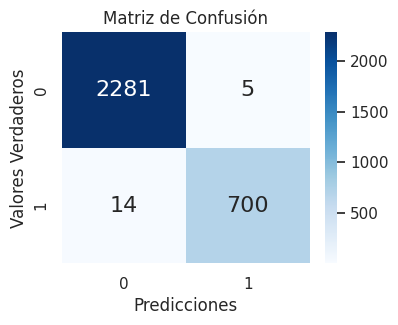

In [107]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

2281 instancias de la clase 0 fueron clasificadas correctamente como clase 0 (verdaderos positivos). 5 instancias de la clase 0 fueron erróneamente clasificadas como clase 1 (falsos negativos).

14 instancias de la clase 1 fueron erróneamente clasificadas como clase 0 (falsos positivos). 700 instancias de la clase 1 fueron clasificadas correctamente como clase 1 (verdaderos negativos).

La matriz de confusión muestra que el modelo ha clasificado la gran mayoría de las instancias correctamente. Solo hay un pequeño número de falsos positivos (5) y falsos negativos (14).

In [108]:
#Curva ROC y AUC
from sklearn.metrics import roc_curve, auc

#Training
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

#Test
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr_test, tpr_test)

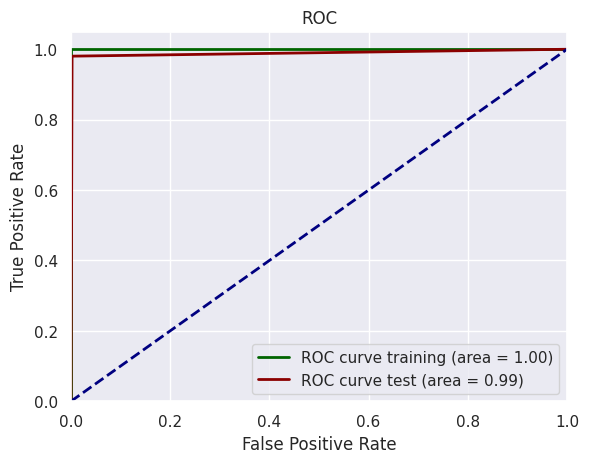

In [109]:
#Grafica
plt.figure()
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve training (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve test (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Un AUC en training de 1.0 representa un rendimiento perfecto del modelo, donde no hay falsos positivos y la tasa de verdaderos positivos es máxima. Un AUC en el conjunto de test de 0.99 sigue siendo muy alto y sugiere un rendimiento excelente del modelo en el conjunto de prueba, aunque no es perfecto. Estos resultados sugieren que el modelo tiene una capacidad muy alta para distinguir entre las clases positivas y negativas, tanto en el conjunto de entrenamiento como en el conjunto de prueba.

**Modelo de tipo Bagging - Hiperparametro 2**

In [110]:
# Report
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2286
           1       0.99      0.98      0.99       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



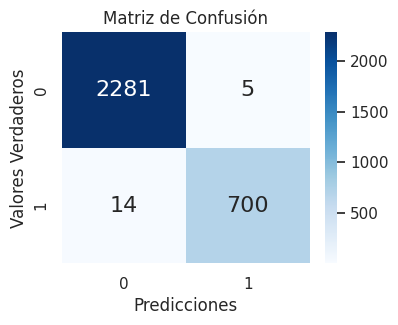

In [111]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_2, y_pred_2)


plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

In [112]:
#Curva ROC y AUC
from sklearn.metrics import roc_curve, auc

#Training
fpr_train, tpr_train, _ = roc_curve(y_train_2, y_pred_train_2)
roc_auc_train = auc(fpr_train, tpr_train)

#Test
fpr_test, tpr_test, _ = roc_curve(y_test_2, y_pred_2)
roc_auc_test = auc(fpr_test, tpr_test)

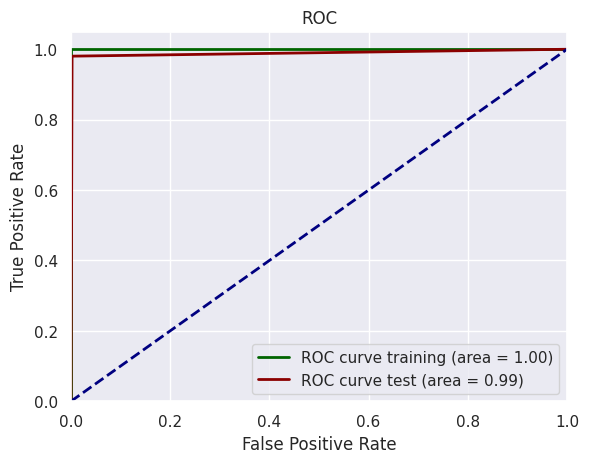

In [113]:
#Grafica
plt.figure()
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve training (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve test (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

A pesar de haber usado diferente hiperparametro para este 2 arbol, ya que se  controlo el tamaño de los subconjuntos del atributo  empleando max_features='sqrt' para hacer que el algoritmo considere la raíz cuadrada del número total de características en cada división, los resultados de sus metricas fueron las mismas.

**Modelo de tipo Boosting - Hiperparametro 1**

In [114]:
# Report
print(classification_report(y_test_boost,y_pred_boost))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.97      0.93      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



Para la clase 0, la precisión es del 98%, lo que significa que el 98% de las instancias clasificadas como clase 0 son realmente de clase 0. Para la clase 1, la precisión es del 97%, indicando que el 97% de las instancias clasificadas como clase 1 son realmente de clase 1.

Para la clase 0, el recall es del 99%, lo que significa que el modelo identifica correctamente el 99% de las instancias de la clase 0. Para la clase 1, el recall es del 93%, indicando que el modelo identifica el 93% de las instancias de la clase 1.

La precisión general del modelo es del 98%, lo que indica que el 98% de las instancias se clasificaron correctamente.

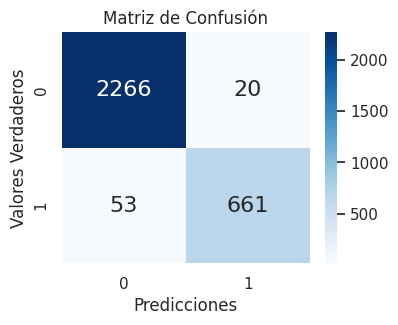

In [115]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_boost, y_pred_boost)


plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

2266 instancias de la clase 0 fueron clasificadas correctamente como clase 0 (verdaderos positivos). 20 instancias de la clase 0 fueron erróneamente clasificadas como clase 1 (falsos negativos).
53 instancias de la clase 1 fueron erróneamente clasificadas como clase 0 (falsos positivos). 661 instancias de la clase 1 fueron clasificadas correctamente como clase 1 (verdaderos negativos).

In [116]:
#Curva ROC y AUC
from sklearn.metrics import roc_curve, auc

#Training
fpr_train, tpr_train, _ = roc_curve(y_train_boost, y_pred_train_boost)
roc_auc_train = auc(fpr_train, tpr_train)

#Test
fpr_test, tpr_test, _ = roc_curve(y_test_boost, y_pred_boost)
roc_auc_test = auc(fpr_test, tpr_test)

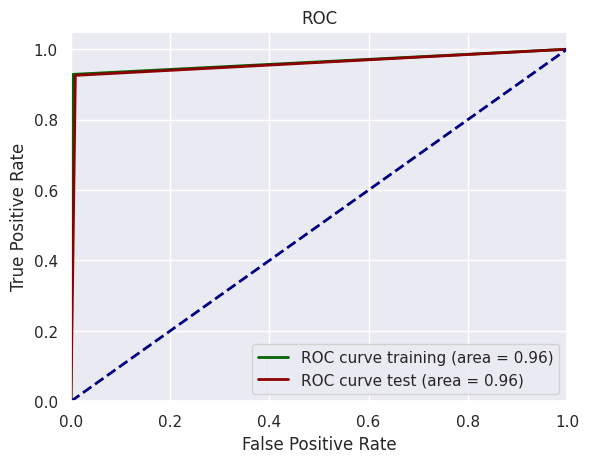

In [117]:
#Grafica
plt.figure()
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve training (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve test (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

En resumen, tener AUC de 0.96 tanto en el conjunto de entrenamiento como en el conjunto de prueba sugiere que el modelo de tipo Boosting con el hiperparámetro 1 tiene un buen poder discriminativo y generaliza adecuadamente a nuevos datos.

**Modelo de tipo Boosting - Hiperparametro 2**

In [118]:
# Report
print(classification_report(y_test_boost2,y_pred_boost2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000



Para la clase 0, la precisión es del 99%, lo que significa que el 99% de las instancias clasificadas como clase 0 son realmente de clase 0. Para la clase 1, la precisión es del 97%, indicando que el 97% de las instancias clasificadas como clase 1 son realmente de clase 1.

Para la clase 0, el recall es del 99%, lo que significa que el modelo identifica correctamente el 99% de las instancias de la clase 0. Para la clase 1, el recall es del 98%, indicando que el modelo identifica el 98% de las instancias de la clase 1.

La precisión indica que el 99% de las instancias se clasificaron correctamente.

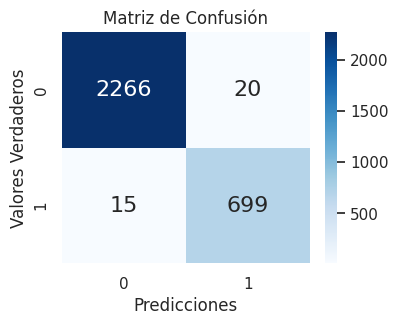

In [119]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_boost2, y_pred_boost2)


plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

2266 instancias de la clase 0 fueron clasificadas correctamente como clase 0 (verdaderos positivos). 20 instancias de la clase 0 fueron erróneamente clasificadas como clase 1 (falsos negativos).

15 instancias de la clase 1 fueron erróneamente clasificadas como clase 0 (falsos positivos). 699 instancias de la clase 1 fueron clasificadas correctamente como clase 1 (verdaderos negativos).

In [120]:
#Curva ROC y AUC
from sklearn.metrics import roc_curve, auc

#Training
fpr_train, tpr_train, _ = roc_curve(y_train_boost2, y_pred_train_boost2)
roc_auc_train = auc(fpr_train, tpr_train)

#Test
fpr_test, tpr_test, _ = roc_curve(y_test_boost2, y_pred_boost2)
roc_auc_test = auc(fpr_test, tpr_test)

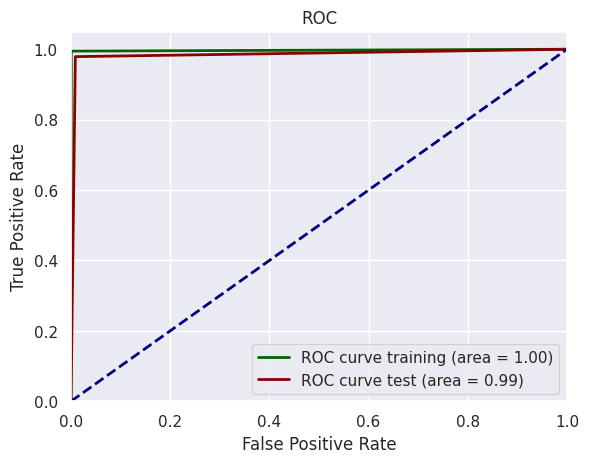

In [121]:
#Grafica
plt.figure()
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve training (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve test (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

La curva ROC ha alcanzado un área bajo la curva (AUC) de 1.00 representa un rendimiento perfecto del modelo en el conjunto de entrenamiento, donde no hay falsos positivos y la tasa de verdaderos positivos es máxima. Para el conjunto de prueba, la curva ROC ha alcanzado un AUC de 0.99 sigue siendo muy alto y sugiere un rendimiento excelente del modelo en el conjunto de prueba, aunque no es perfecto.

Estos resultados sugieren que el modelo de tipo Boosting con el hiperparámetro 2 ha aprendido patrones eficientemente y se comporta muy bien en ambas fases, de entrenamiento y prueba.

## Modelo Elegido

El mejor modelo elegido es el random forest debido a que la cantidad de errores cometidos ha sido menor que los modelos de Boosting.

Aunque el random forest (Bagging) ha tenido los mismos resultados para las curvas ROC AUC de test (0.99) y training (1.00), el random forest solo tuvo falsos 5 instancias de la clase 0 fueron erróneamente clasificadas como clase 1 (falsos negativos) y 14 instancias de la clase 1 fueron erróneamente clasificadas como clase 0 (falsos positivos).

Por el contrario el Boosting con mejor resultados del hiperparametro 2 tuvo 20 instancias de la clase 0 fueron erróneamente clasificadas como clase 1 (falsos negativos). 15 instancias de la clase 1 fueron erróneamente clasificadas como clase 0 (falsos positivos).


## CUESTION 4 - Importancia de las variables para el modelo

Variable: satisfaction_level   Importance: 0.32
Variable: number_project       Importance: 0.2
Variable: time_spend_company   Importance: 0.18
Variable: average_montly_hours Importance: 0.14
Variable: last_evaluation      Importance: 0.12
Variable: Work_accident        Importance: 0.01
Variable: promotion_last_5years Importance: 0.01
Variable: left                 Importance: 0.0
Variable: salary_encoded       Importance: 0.0
Variable: department_IT        Importance: 0.0
Variable: department_RandD     Importance: 0.0
Variable: department_accounting Importance: 0.0
Variable: department_hr        Importance: 0.0
Variable: department_management Importance: 0.0
Variable: department_marketing Importance: 0.0
Variable: department_product_mng Importance: 0.0
Variable: department_sales     Importance: 0.0
Variable: department_support   Importance: 0.0


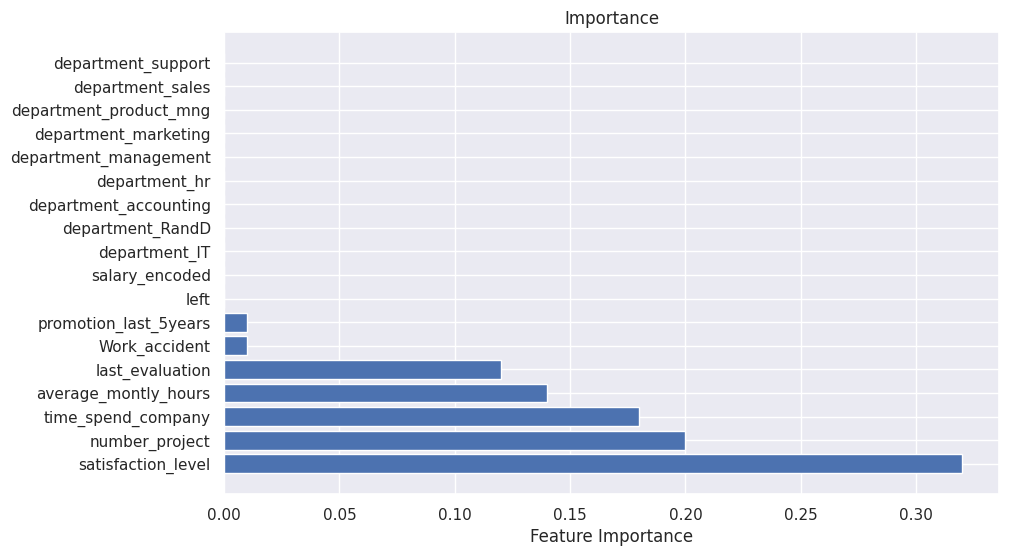

In [122]:
import matplotlib.pyplot as plt

# obtenemos los valores numéricos de la feature importance
importances = list(clf.feature_importances_)

# Lista de tuplas con variable e importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(datos, importances)]

# ordenamos las features importnace
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Imprimimos los datos
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# Crear listas separadas para las variables y las importancias
variables, importance_values = zip(*feature_importances)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(range(len(variables)), importance_values, align='center')
plt.yticks(range(len(variables)), variables)
plt.xlabel('Feature Importance')
plt.title('Importance')
plt.show()

**¿Tiene sentido usar estas variables para evaluar si un empleado va a abandonar la empresa?**

Sí, tiene sentido utilizar las variables con mayor importancia para predecir si un empleado abandonará la empresa. La importancia de las variables en el modelo indica cuánto contribuyen esas variables a la capacidad del modelo para hacer predicciones.

* satisfaction_level (Importance: 0.32)
* time_spend_company (Importance: 0.18)
* average_montly_hours (Importance: 0.14)

Pueden proporcionar información valiosa sobre los factores que contribuyen al abandono de los empleados y son útiles para entender y abordar posibles problemas en el entorno laboral.

Es recomendable utilizar estas variables importantes al tomar decisiones relacionadas con la retención de empleados y la gestión del personal, ya que el modelo ha identificado que son las más informativas para predecir el abandono de la empresa. Sin embargo, siempre es importante considerar el contexto específico de la organización y validar los resultados del modelo con datos y conocimientos adicionales.

## **Fase adicional**

Utiliza para algún método de ensemble que lo permita (AdaBoostClassifier, BaggingClassifier, etc.)  un modelo base diferente a los árboles de decisión y estudiar la influencia que tiene en los resultados, así como en la varianza y sesgo.

In [123]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [124]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [125]:
svm_model = SVC(probability=True, kernel='linear')

In [126]:
# Crear el clasificador AdaBoost con SVM como modelo base
adaboost_svm = AdaBoostClassifier(estimator=svm_model, n_estimators=50, random_state=42)

In [127]:
# Entrenar el modelo
adaboost_svm.fit(X_train_svm, y_train_svm)

AdaBoostClassifier(estimator=SVC(kernel='linear', probability=True),
                   random_state=42)

In [128]:
# Realizar predicciones en el conjunto de prueb
y_pred_svm = adaboost_svm.predict(X_test_svm)

In [129]:
# Report
print(classification_report(y_test_svm,y_pred_svm))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2286
           1       0.00      0.00      0.00       714

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



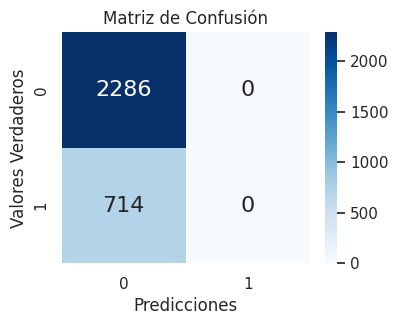

In [130]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_svm, y_pred_svm)


plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

Los resultados indican que el modelo AdaBoostClassifier con un clasificador SVM como modelo base no está funcionando bien para la tarea de clasificación binaria.

Precision: Para la clase 0, la precisión es relativamente alta (0.76), lo que indica que cuando el modelo predice que un empleado no abandonará la empresa, tiene una probabilidad razonable de ser correcto. Sin embargo, para la clase 1, la precisión es 0.00, lo que indica que el modelo no ha logrado predecir correctamente ninguna instancia de abandono de la empresa.

Recall: El recall para la clase 0 es alto (1.00), lo que significa que el modelo identifica correctamente todos los casos en los que un empleado no abandona la empresa. Sin embargo, para la clase 1, el recall es 0.00, lo que indica que el modelo no logra identificar correctamente ninguna instancia de abandono.

Accuracy: La precisión global del modelo es 0.76, lo cual es engañoso ya que está impulsado por la alta precisión en la clase 0, pero el modelo no está siendo útil para predecir la clase 1.

Matriz de Confusión: Todos los casos de la clase 1 están siendo clasificados incorrectamente como clase 0, lo que se refleja en la matriz de confusión.

Sesgo (bias): El sesgo puede estar presente en la incapacidad del modelo para predecir correctamente la clase 1. Parece que el modelo está sesgado hacia la clase mayoritaria y no está logrando aprender patrones efectivos para predecir la clase minoritaria.

Varianza: La varianza podría ser alta, ya que el modelo no está generalizando bien a la clase 1 en el conjunto de prueba.

# **Sprint 4**

##Re-entrenar dicho modelo utilizando las variables más importantes

In [138]:
rf_most_important = RandomForestClassifier(n_estimators= 100, random_state=42)

In [140]:
important_variables = ['satisfaction_level', 'average_montly_hours', 'time_spend_company']

# Filtrar el conjunto de datos original para incluir solo las variables importantes
X_train_important = X_train[important_variables]
X_test_important = X_test[important_variables]

In [141]:
rf_most_important.fit(X_train_important, y_train)

RandomForestClassifier(random_state=42)

In [142]:
y_pred_important = rf_most_important.predict(X_test_important)

In [143]:
#Predecir train
y_pred_train = rf_most_important.predict(X_train_important)

In [144]:
print(f'El accuracy obtenido es de {accuracy_score(y_test, y_pred_important)}')

El accuracy obtenido es de 0.9833333333333333


In [145]:
# Report
print(classification_report(y_test,y_pred_important))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.96      0.97      0.97       714

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [ ]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_important)


plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

##GridSearchCV o RandomizedSearchCV

Mejorar los resultados del proyecto aplicando técnicas de búsqueda exhaustiva (Grid Search) o búsqueda aleatoria (Random Search)

In [131]:
pip_rf = make_pipeline(StandardScaler(),
                       RandomForestClassifier(class_weight="balanced",
                                              random_state=123))

hyperparam_grid = {
        "randomforestclassifier__n_estimators": [10, 50, 100, 500],
        "randomforestclassifier__max_features": ["sqrt", "log2", 0.4, 0.5],
        "randomforestclassifier__min_samples_leaf": [1, 3, 5],
        "randomforestclassifier__criterion": ["gini", "entropy"]}

gs_rf = GridSearchCV(pip_rf,
                     hyperparam_grid,
                     scoring="f1",
                     cv=10,
                     n_jobs=-1)

gs_rf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=123))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy'],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2', 0.4,
                                                                  0.5],
                         'randomforestclassifier__min_samples_leaf': [1, 3, 5],
                         'randomforestclassifier__n_estimators': [10, 50, 100,
                                                                  500]},
             scoring='f1')

In [132]:
print("\033[1m" + "\033[0m" + "Los mejores hiperparámetros:")
print("-" * 25)
for hyperparam in gs_rf.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_rf.best_params_[hyperparam])

print("\033[1m" + "\033[94m" + "La mejor f1-score del CV de 10 folds: {:.2f}%.".format((gs_rf.best_score_) * 100))

Los mejores hiperparámetros:
-------------------------
criterion :  entropy
max_features :  0.5
min_samples_leaf :  1
n_estimators :  500
La mejor f1-score del CV de 10 folds: 97.87%.


In [133]:
# Reajustar RF usando los mejores hiperparámetros
clf_rf = make_pipeline(StandardScaler(),
                       RandomForestClassifier(n_estimators=500,
                                              criterion = "entropy",
                                              max_features = 0.5,
                                              min_samples_leaf = 1,
                                              class_weight="balanced",
                                              random_state=123))


clf_rf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_features=0.5,
                                        n_estimators=500, random_state=123))])

In [134]:
y_pred= clf_rf.predict(X_test)

In [135]:
print(classification_report(y_test, y_pred, target_names=["No", "Sí"]))

              precision    recall  f1-score   support

          No       0.99      1.00      1.00      2286
          Sí       0.99      0.98      0.99       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



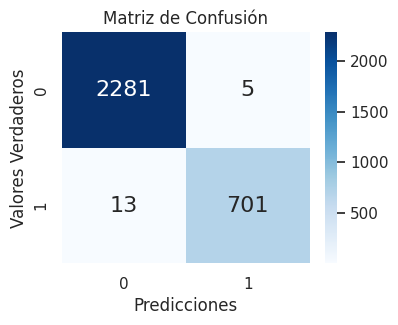

In [136]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

In [137]:
print(f'El accuracy obtenido es de {accuracy_score(y_test, y_pred)}')

El accuracy obtenido es de 0.994


# **Fase adicional: Manejo del balanceo de clases**

In [12]:
#Under sampling
from imblearn.under_sampling import RandomUnderSampler

# Crear una instancia de RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplicar under-sampling al conjunto de entrenamiento
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [17]:
#Probar mejor modelo con el manejo de clases
from sklearn.preprocessing import StandardScaler
clf_rf = make_pipeline(StandardScaler(),
                       RandomForestClassifier(n_estimators=500,
                                              criterion = "entropy",
                                              max_features = 0.5,
                                              min_samples_leaf = 1,
                                              class_weight="balanced",
                                              random_state=123))


clf_rf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_features=0.5,
                                        n_estimators=500, random_state=123))])

In [18]:
y_pred= clf_rf.predict(X_test)
y_train= clf_rf.predict(X_train)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["No", "Sí"]))

              precision    recall  f1-score   support

          No       0.99      1.00      1.00      2286
          Sí       0.99      0.98      0.99       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



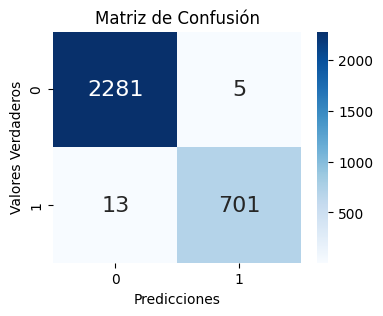

In [21]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

In [22]:
#Curva ROC y AUC
from sklearn.metrics import roc_curve, auc

#Training
fpr_train, tpr_train, _ = roc_curve(y_train, y_train)
roc_auc_train = auc(fpr_train, tpr_train)

#Test
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr_test, tpr_test)

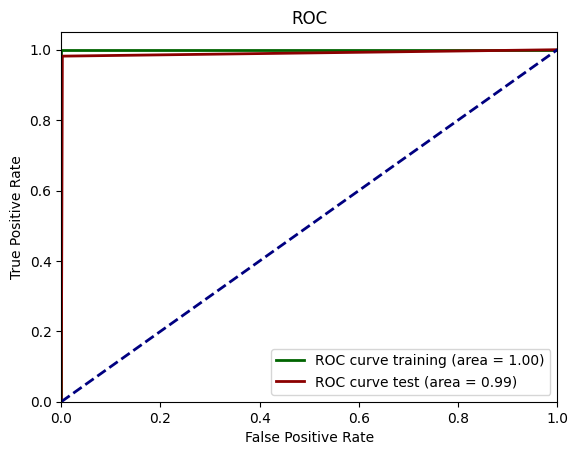

In [23]:
#Grafica
plt.figure()
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve training (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve test (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Los resultados luego de aplicar el under sampling se ha mantenido igual en los diferentes niveles de las metricas de visualizacion utilizadas para evaluarlo.